<a href="https://colab.research.google.com/github/muralikrishnan2022/MACHINE-AND-DEEP-LEARNING/blob/main/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv("/content/CarPrice_Assignment.csv")

# Check the structure of the dataset
print(data.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
# Drop irrelevant columns (if needed)
data = data.drop(['car_ID', 'CarName'], axis=1)

# Handle missing values if needed
data = data.dropna()

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])

# Define the features (independent variables) and the target (dependent variable)
X = data.drop('price', axis=1)  # Features excluding the target variable 'price'
y = data['price']  # Target variable 'price'



In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)



Mean Squared Error: 10067307.10693488
R-squared (R2) Score: 0.872475369321744


In [ ]:
# Get feature importances
feature_importances = model.coef_

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                  Feature   Importance
37   cylindernumber_eight  6363.978855
29    enginelocation_rear  5410.796996
43     cylindernumber_two  3680.534919
36       enginetype_rotor  3680.534919
33         enginetype_ohc  3138.480919
20    carbody_convertible  2240.595618
14        fueltype_diesel  1884.109929
47         fuelsystem_idi  1884.109929
34        enginetype_ohcf  1542.084126
30        enginetype_dohc   940.520071
17       aspiration_turbo   921.219912
49        fuelsystem_mpfi   788.369820
45        fuelsystem_2bbl   706.979940
27         drivewheel_rwd   645.776989
23          carbody_sedan   619.388438
3                carwidth   571.524325
44        fuelsystem_1bbl   556.084285
13             highwaympg   194.134939
18        doornumber_four   154.138974
6              enginesize   123.899791
4               carheight   111.260589
1               wheelbase   108.169496
0               symboling    97.280099
51        fuelsystem_spfi    49.675832
5  

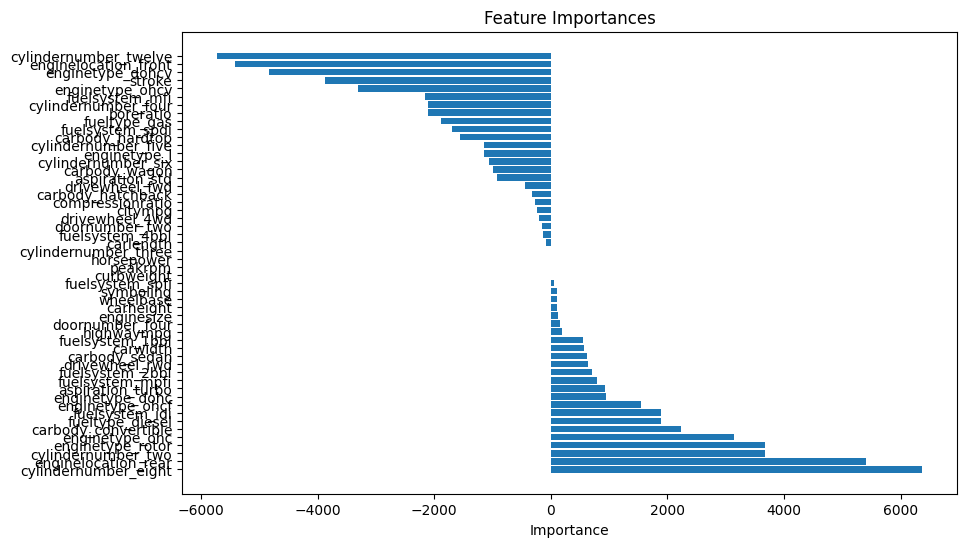

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()